# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# #lets take a look
# test_url = (f"http://api.openweathermap.org/data/2.5/weather?q={cities[1]}&units=imperial&appid={weather_api_key}")
# response =requests.get(test_url)
# chi = response.json()
# city = cities[1]
# lat = chi['coord']['lat']
# lon = chi['coord']['lon']
# temp = chi['main']['temp_max']
# humidity = chi['main']['humidity']
# clouds = chi['clouds']['all']
# windsp = chi['wind']['speed']
# country = chi['sys']['country']
# date = chi['dt']
# response

In [8]:
#using current weather API
town = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
windsp = []
country = []
date = []

processing_counter = 1
set_counter = 1
print("Beginning Data Retrieval")
print("-------------------------------")
for city in cities:
    url = (f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}")
    try:
        response = requests.get(url)
        all_city_data = response.json()
        town.append(all_city_data['name'])
        lat.append(all_city_data['coord']['lat'])
        lon.append(all_city_data['coord']['lon'])
        temp.append(all_city_data['main']['temp_max'])
        humidity.append(all_city_data['main']['humidity'])
        clouds.append(all_city_data['clouds']['all'])
        windsp.append(all_city_data['wind']['speed'])
        country.append(all_city_data['sys']['country'])
        date.append(all_city_data['dt'])
        print(f"Processing Record {processing_counter} of Set {set_counter} | {city}")
        
        processing_counter += 1
        if processing_counter == 50:
            set_counter += 1
        if processing_counter > 50:
            processing_counter = 1

    except:
        print("City not found. Skipping...") 
    continue
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | santander
Processing Record 6 of Set 1 | fier
Processing Record 7 of Set 1 | hilo
City not found. Skipping...
Processing Record 8 of Set 1 | puerto colombia
Processing Record 9 of Set 1 | de aar
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | keuruu
City not found. Skipping...
Processing Record 12 of Set 1 | auki
City not found. Skipping...
Processing Record 13 of Set 1 | remontnoye
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ozernovskiy
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | gushikawa
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | puerto ayora
Processi

Processing Record 36 of Set 4 | olafsvik
Processing Record 37 of Set 4 | udachnyy
Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | pacific grove
Processing Record 40 of Set 4 | diffa
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | illapel
City not found. Skipping...
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | siyabuswa
City not found. Skipping...
Processing Record 48 of Set 4 | kenai
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 5 | coquimbo
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | marsh harbour
Processing Record 4 of Set 5 | copiapo
Processing Record 5 of Set 5 | bagdarin
Processing Record 6 of Set 5 | paragominas
Processing Record 7 of Set 5 | emirdag
Processing Record 8 of Set 5 | lenin

Processing Record 24 of Set 8 | luderitz
Processing Record 25 of Set 8 | saint-francois
City not found. Skipping...
Processing Record 26 of Set 8 | santa marta
Processing Record 27 of Set 8 | dzhebariki-khaya
Processing Record 28 of Set 8 | gornopravdinsk
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | konin
Processing Record 32 of Set 8 | kutum
City not found. Skipping...
Processing Record 33 of Set 8 | asau
Processing Record 34 of Set 8 | saravan
Processing Record 35 of Set 8 | ismailia
Processing Record 36 of Set 8 | nokaneng
Processing Record 37 of Set 8 | nome
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | staryy krym
Processing Record 40 of Set 8 | krasnovishersk
Processing Record 41 of Set 8 | vila do maio
Processing Record 42 of Set 8 | honiara
Processing Record 43 of Set 8 | bontang
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | sao filipe
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
all_city_df = pd.DataFrame({  
    "City": town,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": windsp,
    "Country": country,
    "Date": date
})
all_city_df.to_csv("all_data.csv")
all_city_df.count()

City          532
Latitude      532
Longitude     532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [10]:
all_city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,68.00,66,81,5.08,US,1597551603
1,Tiksi,71.69,128.87,43.00,79,94,3.11,RU,1597551763
2,Bluff,-46.60,168.33,48.99,74,49,4.00,NZ,1597551763
3,Torbay,47.67,-52.73,48.00,93,5,4.70,CA,1597551763
4,Santander,43.46,-3.80,63.00,87,20,5.50,ES,1597551764
...,...,...,...,...,...,...,...,...,...
527,Salta,-24.79,-65.41,44.60,75,0,2.24,AR,1597551869
528,Tahoua,14.89,5.27,80.60,74,17,9.17,NE,1597551869
529,Sweetwater,25.76,-80.37,84.20,74,20,6.58,US,1597551669
530,Tezu,27.92,96.17,76.87,86,100,1.81,IN,1597551869


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
all_city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.362030,13.687500,67.929079,70.481203,43.815789,7.435470,1.597552e+09
std,33.608319,89.925659,14.327235,19.897989,37.498222,5.305407,6.314702e+01
min,-54.800000,-179.170000,30.130000,9.000000,0.000000,0.380000,1.597552e+09
25%,-8.810000,-65.485000,56.972500,60.000000,3.750000,3.360000,1.597552e+09
50%,21.390000,19.740000,69.920000,74.000000,40.000000,5.905000,1.597552e+09
75%,48.957500,88.027500,78.800000,85.250000,80.000000,9.715000,1.597552e+09
max,78.220000,178.420000,99.320000,100.000000,100.000000,35.570000,1.597552e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = all_city_df.loc[all_city_df["Humidity"]>100, :]
humidity100

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#skipping this step as no cities are > 100 percent humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

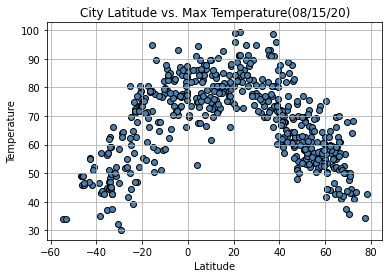

In [14]:
plt.scatter(all_city_df["Latitude"],all_city_df["Max Temp"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature(08/15/20)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latsVsTemps.png", format='png')
plt.show()

In [ ]:
#plot showing the max temperatures of cities vs latitude. The plot suggests that max temperatures increase toward the 
#equator (lat=0) but may actually be warmer at latitudes bewteen 20 and 40 degrees

## Latitude vs. Humidity Plot

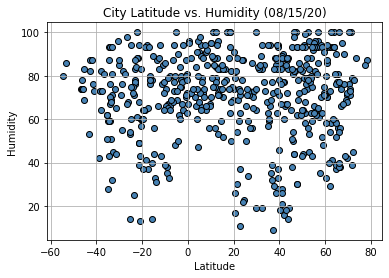

In [15]:
plt.scatter(all_city_df["Latitude"],all_city_df["Humidity"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (08/15/20)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latsVsHumidity.png", format='png')
plt.show()

In [ ]:
#plot showing the humidity of cities vs latitude. The plot shows little correlation between humidity and latitude
#The plot also may show that that humidity percentages over 60 are more common

## Latitude vs. Cloudiness Plot

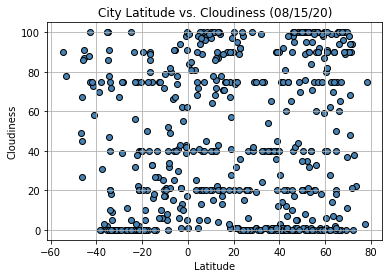

In [16]:
plt.scatter(all_city_df["Latitude"],all_city_df["Cloudiness"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (08/15/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latsVsclouds.png", format='png')
plt.show()

In [17]:
#plot showing the cloudiness of cities vs latitude.The plot shows little correlation between cloudiness and latitude

## Latitude vs. Wind Speed Plot

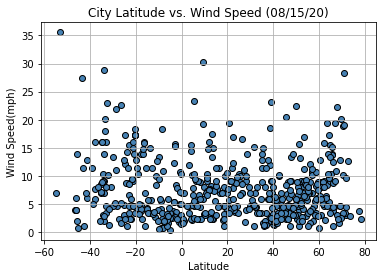

In [18]:
plt.scatter(all_city_df["Latitude"],all_city_df["Wind Speed"], marker="o", color="steelblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (08/15/20)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("latsVsWindSpeed.png", format='png')
plt.show()

In [ ]:
#plot showing the Wind Speed in cities vs latitude. The plot shows little correlation between wind speed and latitude
#The plot also may show that that wind speeds less than 10 mph are more common

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plot


In [20]:
# Create Northern and Southern Hemisphere DataFrames
south_hem_df = all_city_df.loc[all_city_df["Latitude"]<0, :]

In [21]:
north_hem_df = all_city_df.loc[all_city_df["Latitude"]>0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared: 0.5537979861582728
y = -0.5x + 88.8


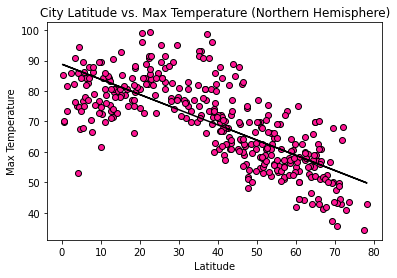

In [22]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Max Temp'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"R Squared: {rvalue**2}")
print(line_eq)

plt.savefig("latsVsTempNH.png", format='png')
plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Max Temperature in Northern Hemisphere
# R squared value suggests that there may be a correlation between Max Tempurature and Latitude 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared: 0.6057836679771965
y = 0.89x + 83.52


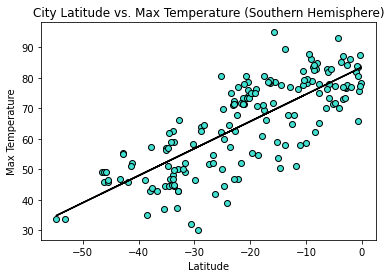

In [23]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Max Temp'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsTempSH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Max Temperature in Southern Hemisphere
# R squared value suggests that there is a correlation between Max Tempurature and Latitude 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared: 0.004652620846773469
y = -0.07x + 74.0


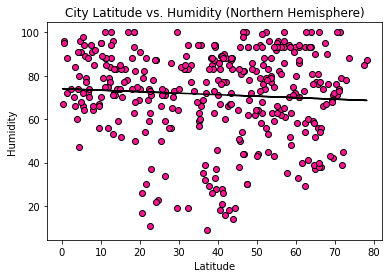

In [24]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsHumidityNH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Humidity in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Humidity and Latitude 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared: 3.3417468015517458e-06
y = -0.0x + 68.71


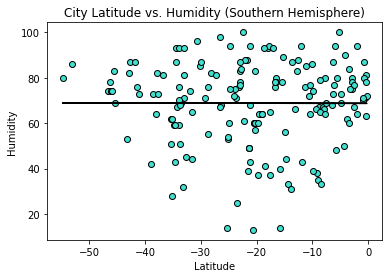

In [25]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsHumiditySH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Humidity in Southern Hemisphere
# R squared value suggests that there is little to no correlation between Humidity and Latitude 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared: 0.00031963681033738914
y = -0.03x + 48.55


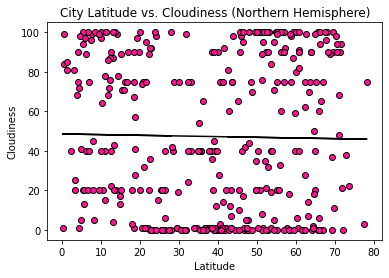

In [26]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsCloudsNH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. cloudiness in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Cloudiness and Latitude 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared: 0.0026460538638645786
y = -0.13x + 34.07


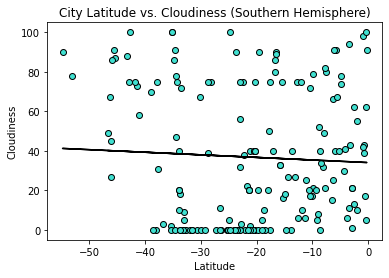

In [27]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsCloudsSH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. cloudiness in Southern Hemisphere
# R squared value suggests that there is little to no correlation between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared: 0.002428030501426475
y = 0.01x + 6.73


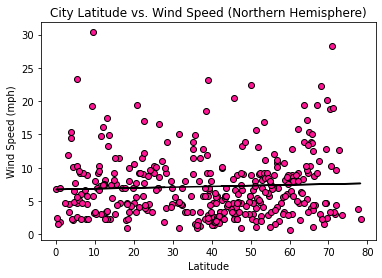

In [28]:
x_values = north_hem_df['Latitude'].astype(float)
y_values = north_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="deeppink", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsWindsNH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Wind Speed in Northern Hemisphere
# R squared value suggests that there is little to no correlation between Wind Speed and Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared: 0.07272698047274923
y = -0.13x + 5.33


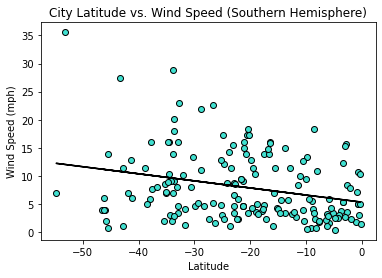

In [29]:
x_values = south_hem_df['Latitude'].astype(float)
y_values = south_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, marker="o", color="turquoise", edgecolor="black")
plt.plot(x_values, regress_values, "r-", color="black")
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"R Squared: {rvalue**2}")
print(line_eq)
plt.savefig("latsVsWindsSH.png", format='png')

plt.show()

In [ ]:
#plot showing the linear regression for City Latitude vs. Wind Speed in Southern Hemisphere
# R squared value suggests that there may be a slight correlation between Wind Speed and Latitude